<a href="https://colab.research.google.com/github/GabrielTrentino/TCC/blob/master/TCC_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Bibliotecas:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Importando o Dataset:

In [2]:
data_path = "https://raw.githubusercontent.com/GabrielTrentino/TCC/master/DadosGerais%20-%20Plan1.csv"
df = pd.read_csv(data_path)
df.head(1)

,DateTime,MÊS,ANO,PIB,PIB_CONS_POR,vol_PIB_BRASIL,vol_PIB_GOIAS,IBOVESPA_POR,DOLAR,SELIC,Desemprego,PJ total,PF não rotativo,IPCA,Salário
0,1/2005,1,2005,NaN,NaN,2.170585e+09,53865113.0,-7.04,27074.0,18.25,NaN,NaN,NaN,NaN,NaN


In [3]:
df.index = pd.to_datetime(df.DateTime, format = "%m/%Y")
df.drop(["MÊS", "ANO", "DateTime"], inplace = True, axis = 1)

df.PIB_CONS_POR = df.PIB_CONS_POR.str.replace(',','.').astype(float)
df.interpolate(method='linear', inplace = True)
df = df[96:-4]
df.fillna(df[df.index < "2014"].mean(), inplace = True)

df.head(1)

,PIB,PIB_CONS_POR,vol_PIB_BRASIL,vol_PIB_GOIAS,IBOVESPA_POR,DOLAR,SELIC,Desemprego,PJ total,PF não rotativo,IPCA,Salário
DateTime,,,,,,,,,,,,
2013-01-01,2.0,2.633333,5.331619e+09,151300175.0,-1.95,20374.0,7.14,7.2,4.299091,6.158182,6.15,678.0


#Observando informações do Dataset:

In [4]:
df.shape

(84, 12)

In [5]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

Salário            0.0
IPCA               0.0
PF não rotativo    0.0
PJ total           0.0
Desemprego         0.0
SELIC              0.0
DOLAR              0.0
IBOVESPA_POR       0.0
vol_PIB_GOIAS      0.0
vol_PIB_BRASIL     0.0
PIB_CONS_POR       0.0
PIB                0.0
dtype: float64

In [6]:
df.dtypes

PIB                float64
PIB_CONS_POR       float64
vol_PIB_BRASIL     float64
vol_PIB_GOIAS      float64
IBOVESPA_POR       float64
DOLAR              float64
SELIC              float64
Desemprego         float64
PJ total           float64
PF não rotativo    float64
IPCA               float64
Salário            float64
dtype: object

In [7]:
df.describe().round(2)

,PIB,PIB_CONS_POR,vol_PIB_BRASIL,vol_PIB_GOIAS,IBOVESPA_POR,DOLAR,SELIC,Desemprego,PJ total,PF não rotativo,IPCA,Salário
count,84.00,84.00,8.400000e+01,8.400000e+01,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00
mean,0.12,-4.05,6.160806e+09,1.782005e+08,2.14,29871.00,9.93,10.07,1.87,4.74,5.88,851.29
std,2.35,5.40,4.511709e+08,1.469660e+07,6.66,9870.45,3.10,2.44,7.75,11.42,2.36,114.38
min,-4.60,-11.40,5.331619e+09,1.513002e+08,-11.70,1.96,5.00,6.20,-11.56,-17.11,2.46,678.00
25%,-1.58,-8.76,5.778953e+09,1.650153e+08,-2.82,23587.00,6.69,7.40,-2.78,-2.14,3.86,724.00
50%,1.07,-4.82,6.269328e+09,1.817596e+08,0.99,31969.50,10.07,11.20,1.37,5.35,6.00,880.00
75%,1.60,0.95,6.583319e+09,1.918987e+08,8.00,37445.00,13.06,12.12,7.18,15.75,7.28,954.00
max,3.20,6.20,6.583319e+09,1.918987e+08,16.97,42234.00,14.25,13.70,15.53,22.47,10.71,998.00


#Matriz de Correlação:

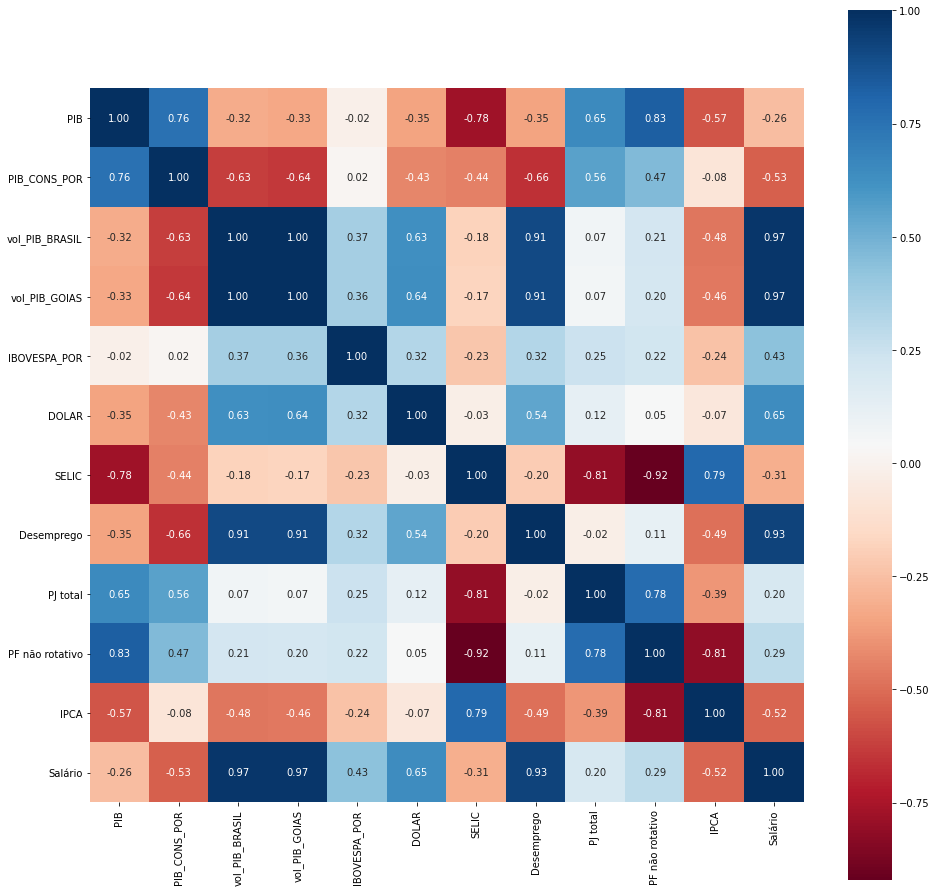

In [8]:
fig, ax = plt.subplots(figsize = (16,16))

sns.heatmap(df.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


#Observando o Comportamento entre duas variáveis:

##SELIC X Salário:

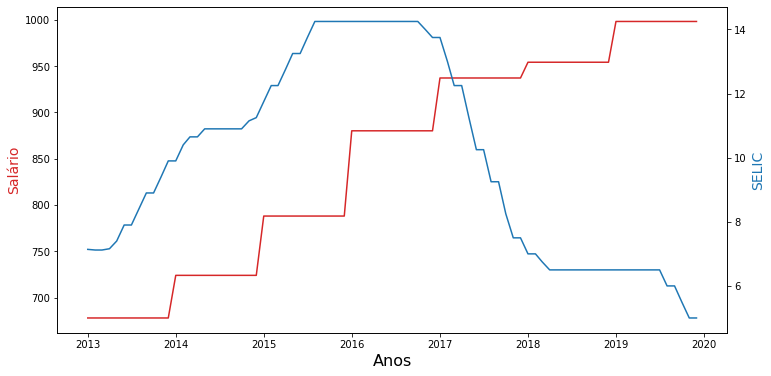

In [9]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.set_xlabel('Anos', fontsize = 16)
ax1.set_ylabel('Salário', fontsize = 14, color=color)
ax1.plot(df.index, df.Salário, label = "Salário", color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SELIC', fontsize = 14, color=color)
ax2.plot(df.index, df.SELIC, label = "SELIC");

##SELIC X Concensão de Crédito

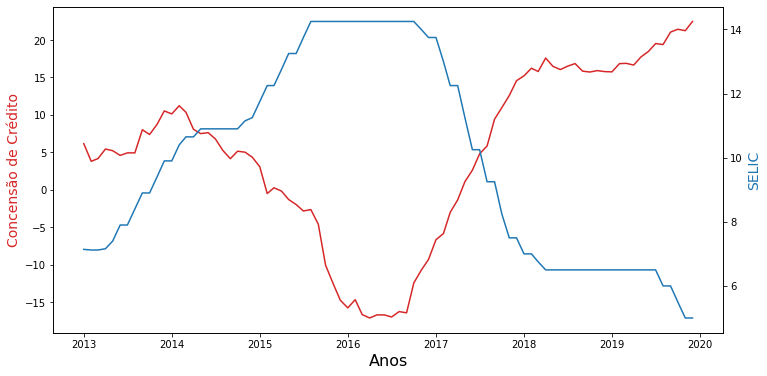

In [10]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.set_xlabel('Anos', fontsize = 16)
ax1.set_ylabel('Concensão de Crédito', fontsize = 14, color=color)
ax1.plot(df.index, df["PF não rotativo"], label = "Concensão de Crédito", color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SELIC', fontsize = 14, color=color)
ax2.plot(df.index, df.SELIC, label = "SELIC");

##SELIC X IPCA:

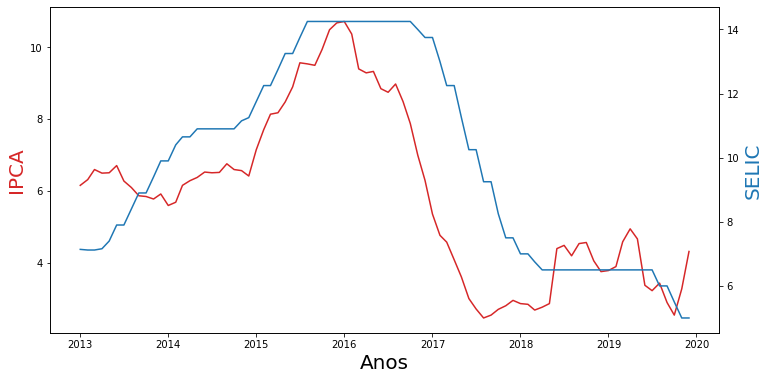

In [11]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.set_xlabel('Anos', fontsize = 20)
ax1.set_ylabel('IPCA', fontsize = 20, color=color)
ax1.plot(df.index, df.IPCA, label = "IPCA", color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SELIC', fontsize = 20, color=color)
ax2.plot(df.index, df.SELIC, label = "SELIC");

##PIB GOIAS X PIB BRASIL:

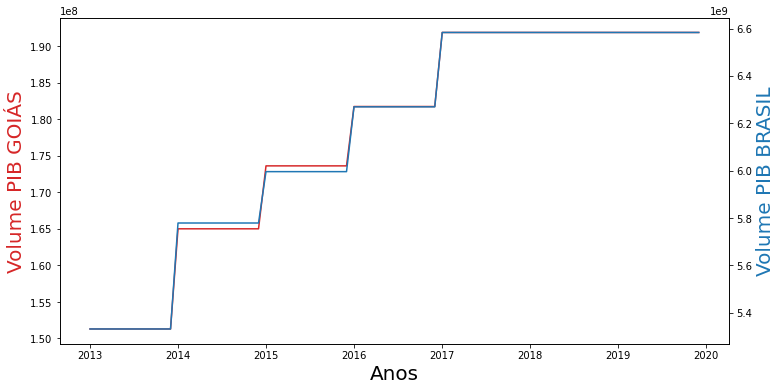

In [12]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.set_xlabel('Anos', fontsize = 20)
ax1.set_ylabel('Volume PIB GOIÁS', fontsize = 20, color=color)
ax1.plot(df.index, df.vol_PIB_GOIAS, color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volume PIB BRASIL', fontsize = 20, color=color)
ax2.plot(df.index, df.vol_PIB_BRASIL);

##PIB CONS X PIB BRASIL:

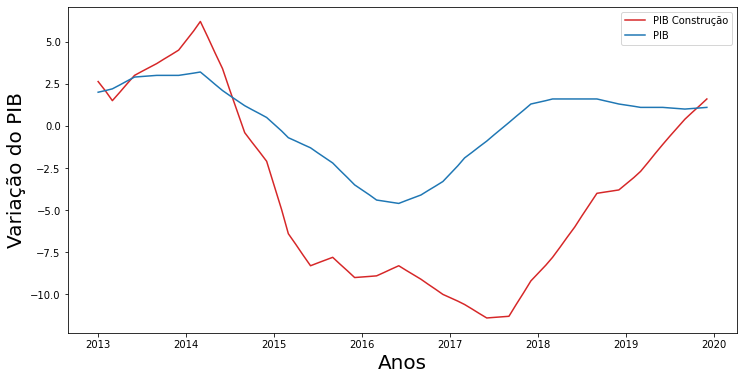

In [13]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
plt.xlabel('Anos', fontsize = 20)
plt.ylabel('Variação do PIB', fontsize = 20)
plt.plot(df.PIB_CONS_POR.dropna(), color = color, label = "PIB Construção")

color = 'tab:blue'
plt.plot(df.PIB.dropna(), color = color, label = "PIB")
plt.legend();

#Parte 2: Metragens:

In [14]:
metragem_path = 'https://raw.githubusercontent.com/GabrielTrentino/TCC/master/Metragem_por_Tipo.csv'
df_metragem = pd.read_csv(metragem_path)
df_metragem.index = pd.to_datetime(df_metragem["Unnamed: 0"], format = "%m/%Y")
df_metragem.drop("Unnamed: 0", axis = 1, inplace=True)
df_metragem.head(1)

,Tipo,Alto,Normal,Baixo,Mínimo
Unnamed: 0,,,,,
2005-01-01,Tipo1,NaN,491.59,357.25,296.73


In [15]:
df_new = pd.DataFrame()
df_new['Tipo1Norm'] = df_metragem.query("Tipo == 'Tipo1'").Normal
df_new['Tipo1Baix'] = df_metragem.query("Tipo == 'Tipo1'").Baixo
df_new['Tipo1Mini'] = df_metragem.query("Tipo == 'Tipo1'").Mínimo
df_new['Tipo2Norm'] = df_metragem.query("Tipo == 'Tipo2'").Normal
df_new['Tipo2Baix'] = df_metragem.query("Tipo == 'Tipo2'").Baixo
df_new['Tipo2Mini'] = df_metragem.query("Tipo == 'Tipo2'").Mínimo
df_new['Tipo3Norm'] = df_metragem.query("Tipo == 'Tipo3'").Normal
df_new['Tipo3Baix'] = df_metragem.query("Tipo == 'Tipo3'").Baixo
df_new['Tipo3Mini'] = df_metragem.query("Tipo == 'Tipo3'").Mínimo
df_new['Tipo4Norm'] = df_metragem.query("Tipo == 'Tipo4'").Normal
df_new['Tipo4Baix'] = df_metragem.query("Tipo == 'Tipo4'").Baixo
df_new['Tipo4Alto'] = df_metragem.query("Tipo == 'Tipo4'").Alto
df_new['Tipo5Norm'] = df_metragem.query("Tipo == 'Tipo5'").Normal
df_new['Tipo5Baix'] = df_metragem.query("Tipo == 'Tipo5'").Baixo
df_new['Tipo5Mini'] = df_metragem.query("Tipo == 'Tipo5'").Mínimo
df_new['Tipo6Norm'] = df_metragem.query("Tipo == 'Tipo6'").Normal
df_new['Tipo6Baix'] = df_metragem.query("Tipo == 'Tipo6'").Baixo
df_new['Tipo6Mini'] = df_metragem.query("Tipo == 'Tipo6'").Mínimo
df_new['Tipo7Norm'] = df_metragem.query("Tipo == 'Tipo7'").Normal
df_new['Tipo7Baix'] = df_metragem.query("Tipo == 'Tipo7'").Baixo
df_new['Tipo7Mini'] = df_metragem.query("Tipo == 'Tipo7'").Mínimo
df_new = df_new[96:]
df_new.head()

,Tipo1Norm,Tipo1Baix,Tipo1Mini,Tipo2Norm,Tipo2Baix,Tipo2Mini,Tipo3Norm,Tipo3Baix,Tipo3Mini,Tipo4Norm,Tipo4Baix,Tipo4Alto,Tipo5Norm,Tipo5Baix,Tipo5Mini,Tipo6Norm,Tipo6Baix,Tipo6Mini,Tipo7Norm,Tipo7Baix,Tipo7Mini
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2013-01-01,870.37,602.98,521.04,978.80,677.45,585.42,974.20,691.48,606.03,829.03,571.12,965.66,1057.24,732.23,637.00,898.10,679.06,604.82,777.92,591.22,523.65
2013-02-01,870.62,604.88,522.83,979.16,679.57,587.40,974.54,693.58,607.96,829.04,572.85,966.19,1057.70,734.44,639.12,898.29,680.33,605.94,778.22,592.35,524.66
2013-03-01,870.31,607.91,525.92,978.74,682.83,590.76,973.66,696.25,610.94,828.13,575.29,970.03,1056.91,737.74,642.73,898.31,682.23,607.91,777.37,593.68,526.26
2013-04-01,874.64,610.41,532.68,983.89,686.07,598.62,978.81,700.02,619.04,832.38,577.69,976.14,1062.74,741.86,651.17,903.33,687.61,615.31,782.43,598.32,533.55
2013-05-01,824.72,575.44,499.21,928.02,646.83,561.19,922.75,659.55,580.28,785.26,544.56,925.62,1002.98,699.59,610.51,849.22,646.01,575.18,739.02,564.45,500.71


In [16]:
df_new.shape

(85, 21)

#Primeira Tentativa:
Utilizando todos os dados disponíveis:

In [17]:
X_train = df.loc["2014"]
X_test = df.loc["2015"]
y_train = df_new.Tipo1Norm["2014"]
y_test = df_new.Tipo1Norm["2015"]

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Treino R² = {:.8f}\nTeste R² = {:.8f}".format(modelo.score(X_train,y_train), metrics.r2_score(y_test, y_pred)))

Treino R² = 0.98379501
Teste R² = -3.43653993


#Variáveis de Análise para validação:

In [0]:
def validacao_TCC(X_train, y_train, y_test, y_pred):
  R_treino = modelo.score(X_train,y_train)
  R_teste = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred)
  valid_TCC = [R_treino, R_teste, RMSE]
  return valid_TCC

#Técnica de Janela Móvel ou Deslizante:

Os são analisados de ano à ano ou em grupo de anos. Por exemplo: usamos os dados de 2013 para treinar, e 2014 para validar. Em seguida, usamos os dados de 2014 para treinar e 2015 para validar.

Podemos ainda utilizar dois anos para treinar (2013 e 2014 ou 2015 e 2016) e um ano para validar (2015 ou 2017). Podendo essas quantidades de anos ser alteradas.

In [0]:
def JanelaMovel_RegressaoLinear(df, df_new, qnt_data_1grupo=1, qnt_data_2grupo=1):

  #Cria uma Lista para poder criar um DataFrame no final:
  resultados = []

  #Quais serão os anos analisados:
  lista_anos = ["2013","2014", "2015", "2016", "2017", "2018", "2019"]

  for nome, dados in df_new.iteritems():
    for pos, ano in enumerate(lista_anos):

      #Variáveis Anos:
      data_separador = str(int(ano)+qnt_data_1grupo)
      data_fin = str(int(ano)+qnt_data_2grupo+1)
      
      #Quebra o laço de Repetição:
      if str(int(data_fin)-2) == lista_anos[-1]:
        break

      #Convertendo a Series "dados" para um DataFrame:
      dados = pd.DataFrame(dados)

      #Criando variáveis de treino e teste de acordo com tipo de imóvel e ano:
      X_train = df[df.index >= ano][df[df.index >= ano].index < data_separador]
      X_test = df[df.index >= data_separador][df[df.index >= data_separador].index < data_fin]
      y_train = dados[dados.index >= ano][dados[dados.index >= ano].index < data_separador]
      y_test = dados[dados.index >= data_separador][dados[dados.index >= data_separador].index < data_fin]

      #Criando o modelo, treinando e chutando os valores:
      modelo = LinearRegression()
      modelo.fit(X_train, y_train)
      y_pred = modelo.predict(X_test)

      #Variáveis para criar o DataFrame:
      infos_de_validar = []
      infos_de_validar = [nome, ano]
      for i in validacao_TCC(X_train, y_train, y_test, y_pred):
        infos_de_validar.append(i)
        
      resultados.append(infos_de_validar)

  resultados = pd.DataFrame(resultados, columns=["Var_y", "Ano", "R_treino", "R_teste", "RMSE"])
  return resultados

In [20]:
JanelaMovel_RegressaoLinear(df, df_new)

,Var_y,Ano,R_treino,R_teste,RMSE
0,Tipo1Norm,2013,-15.894325,-1285.948601,612679.110358
1,Tipo1Norm,2014,0.983795,-3.436540,2828.142910
2,Tipo1Norm,2015,-3.436540,-51.138074,21008.893249
3,Tipo1Norm,2016,-68.525755,-148.459888,60032.277972
4,Tipo1Norm,2017,-183.787189,-148.976768,1634.592937
...,...,...,...,...,...
121,Tipo7Mini,2014,-1038.075394,-13.747736,1446.743930
122,Tipo7Mini,2015,-2077.075228,-78.922579,14323.219973
123,Tipo7Mini,2016,-490.312678,-58.828235,7273.844363
124,Tipo7Mini,2017,-282.030453,-19.936450,2066.100789


In [21]:
JanelaMovel_RegressaoLinear(df, df_new, 2,2)

,Var_y,Ano,R_treino,R_teste,RMSE
0,Tipo1Norm,2013,-1.316947,-0.462402,932.231718
1,Tipo1Norm,2014,0.230806,-1.180873,878.776617
2,Tipo1Norm,2015,-8.969569,-86.988734,35341.684062
3,Tipo1Norm,2016,-51.020985,-44.132799,491.901213
4,Tipo1Norm,2017,-108.127362,0.293613,497.166602
...,...,...,...,...,...
100,Tipo7Mini,2013,-398.855675,-10.583121,1136.297104
101,Tipo7Mini,2014,-521.717018,-5.949125,1245.378357
102,Tipo7Mini,2015,-359.489969,-55.290965,6843.787301
103,Tipo7Mini,2016,-159.488151,-15.608808,1639.030064


#Técnica de Janela Expansível:

Esse tipo de Janela permite que exploremos a evolução das validações ao decorrer dos anos. Para isso utilizamos os dados de 2013 para treino e os dados de 2014 para validação. Em seguida, 2013 e 2014 para treino e 2015 para validação.

Essa sequência vai até utilizarmos 2013, 2014, 2015, 2016, 2017, 2018 para treino e 2019 para validação.

In [0]:
def JanelaExpansivel_RegressaoLinear(df, df_new, qnt_data_1grupo=1, qnt_data_2grupo=1):

  #Cria uma Lista para poder criar um DataFrame no final:
  resultados = []

  #Quais serão os anos analisados:
  lista_anos = ["2013","2014", "2015", "2016", "2017", "2018", "2019"]

  for nome, dados in df_new.iteritems():
    for pos, ano in enumerate(lista_anos):

      #Variáveis Anos:
      data_separador = str(int(ano)+qnt_data_1grupo)
      data_fin = str(int(ano)+qnt_data_2grupo+1)
      
      #Quebra o laço de Repetição:
      if str(int(data_fin)-2) == lista_anos[-1]:
        break

      #Convertendo a Series "dados" para um DataFrame:
      dados = pd.DataFrame(dados)

      #Criando variáveis de treino e teste de acordo com tipo de imóvel e ano:
      X_train = df[df.index >= lista_anos[0]][df[df.index >= lista_anos[0]].index < data_separador]
      X_test = df[df.index >= data_separador][df[df.index >= data_separador].index < data_fin]
      y_train = dados[dados.index >= lista_anos[0]][dados[dados.index >= lista_anos[0]].index < data_separador]
      y_test = dados[dados.index >= data_separador][dados[dados.index >= data_separador].index < data_fin]

      #Criando o modelo, treinando e chutando os valores:
      modelo = LinearRegression()
      modelo.fit(X_train, y_train)
      y_pred = modelo.predict(X_test)

      #Variáveis para criar o DataFrame:
      infos_de_validar = []
      infos_de_validar = [nome, ano]
      for i in validacao_TCC(X_train, y_train, y_test, y_pred):
        infos_de_validar.append(i)
        
      resultados.append(infos_de_validar)

  resultados = pd.DataFrame(resultados, columns=["Var_y", "data_separador", "R_treino", "R_teste", "RMSE"])
  return resultados

In [23]:
JanelaExpansivel_RegressaoLinear(df, df_new, 1, 1)

,Var_y,data_separador,R_treino,R_teste,RMSE
0,Tipo1Norm,2013,-15.894325,-1285.948601,612679.110358
1,Tipo1Norm,2014,-1.316947,-0.462402,932.231718
2,Tipo1Norm,2015,0.183335,-6.901753,3183.989581
3,Tipo1Norm,2016,-0.698572,-37.756989,15567.189139
4,Tipo1Norm,2017,-1.935706,-231.199709,2530.738666
...,...,...,...,...,...
121,Tipo7Mini,2014,-398.855675,-10.583121,1136.297104
122,Tipo7Mini,2015,-234.413731,-4.731752,1027.208464
123,Tipo7Mini,2016,-107.494758,-28.622142,3601.424184
124,Tipo7Mini,2017,-56.905640,-38.784196,3926.079175
